In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

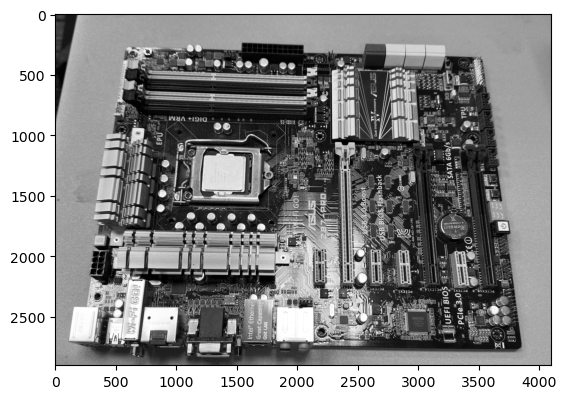

In [5]:
#Loading image and converting to grayscale
img = cv.imread('motherboard_image.JPEG')

img = img[600:3500, 900:5000]

blur = cv.GaussianBlur(img, (5,5), 0)

img_gray = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap = 'gray')

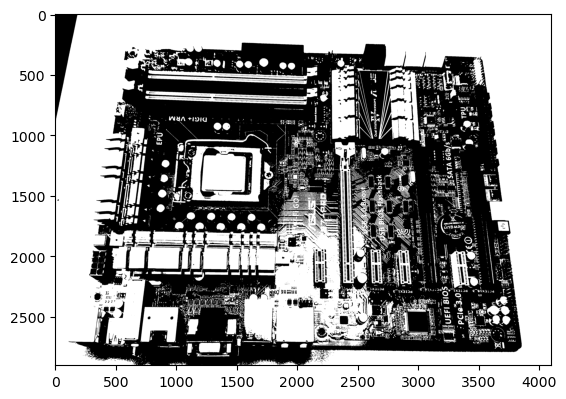

In [6]:
#Thresholding the image
_, thresh = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

plt.imshow(thresh, cmap='gray')

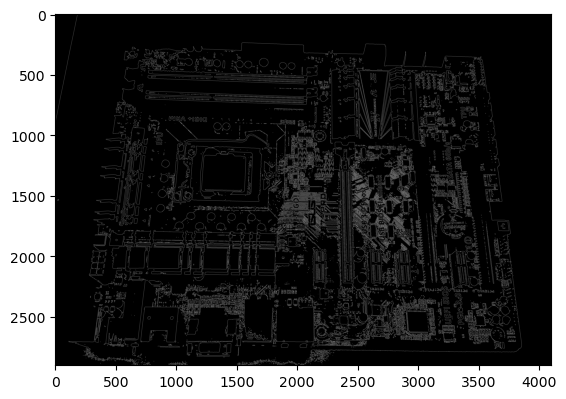

In [7]:
#Get edges
edges = cv.Canny(thresh, 115, 500)

plt.imshow(edges, cmap='gray')

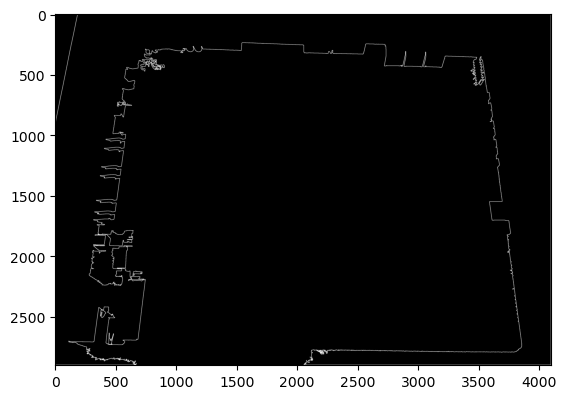

In [8]:
#Find contour

cntrs, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

min_cntr_area = 100

largest_cntr = None
for cntr in cntrs:
    if cv.contourArea(cntr) > min_cntr_area:
        if largest_cntr is None or cv.contourArea(cntr) > cv.contourArea(largest_cntr):
            largest_cntr = cntr


output_img = np.copy(img)

cv.drawContours(output_img, [largest_cntr], -1, (0, 255), 3)

cntr_img = np.zeros_like(img)
cv.drawContours(cntr_img, [largest_cntr], -1, (255, 255, 255), 2)

plt.imshow(cntr_img)

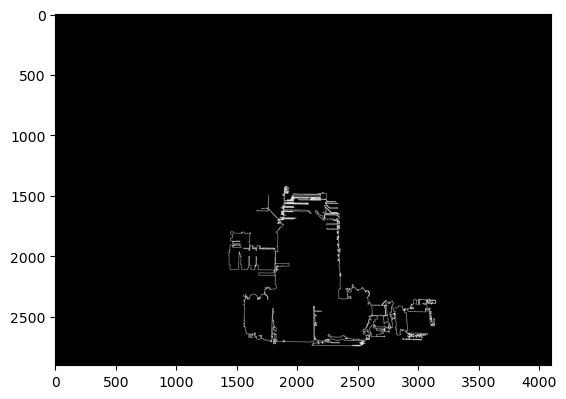

In [9]:
#Filter contours for motherboard

min_ar = 0.8
max_ar = 1.3

valid_cntrs = []

for cntr in cntrs:
    x, y, w, h = cv.boundingRect(cntr)

    ar = float(w)/float(h)

    if min_ar <= ar <= max_ar:
        valid_cntrs.append(cntr)

if valid_cntrs:
    largest_cntr = max(valid_cntrs, key = cv.contourArea)

cntr_img = np.zeros_like(img)
cv.drawContours(cntr_img, [largest_cntr], -1, (255, 255, 255), 2)

plt.imshow(cntr_img)